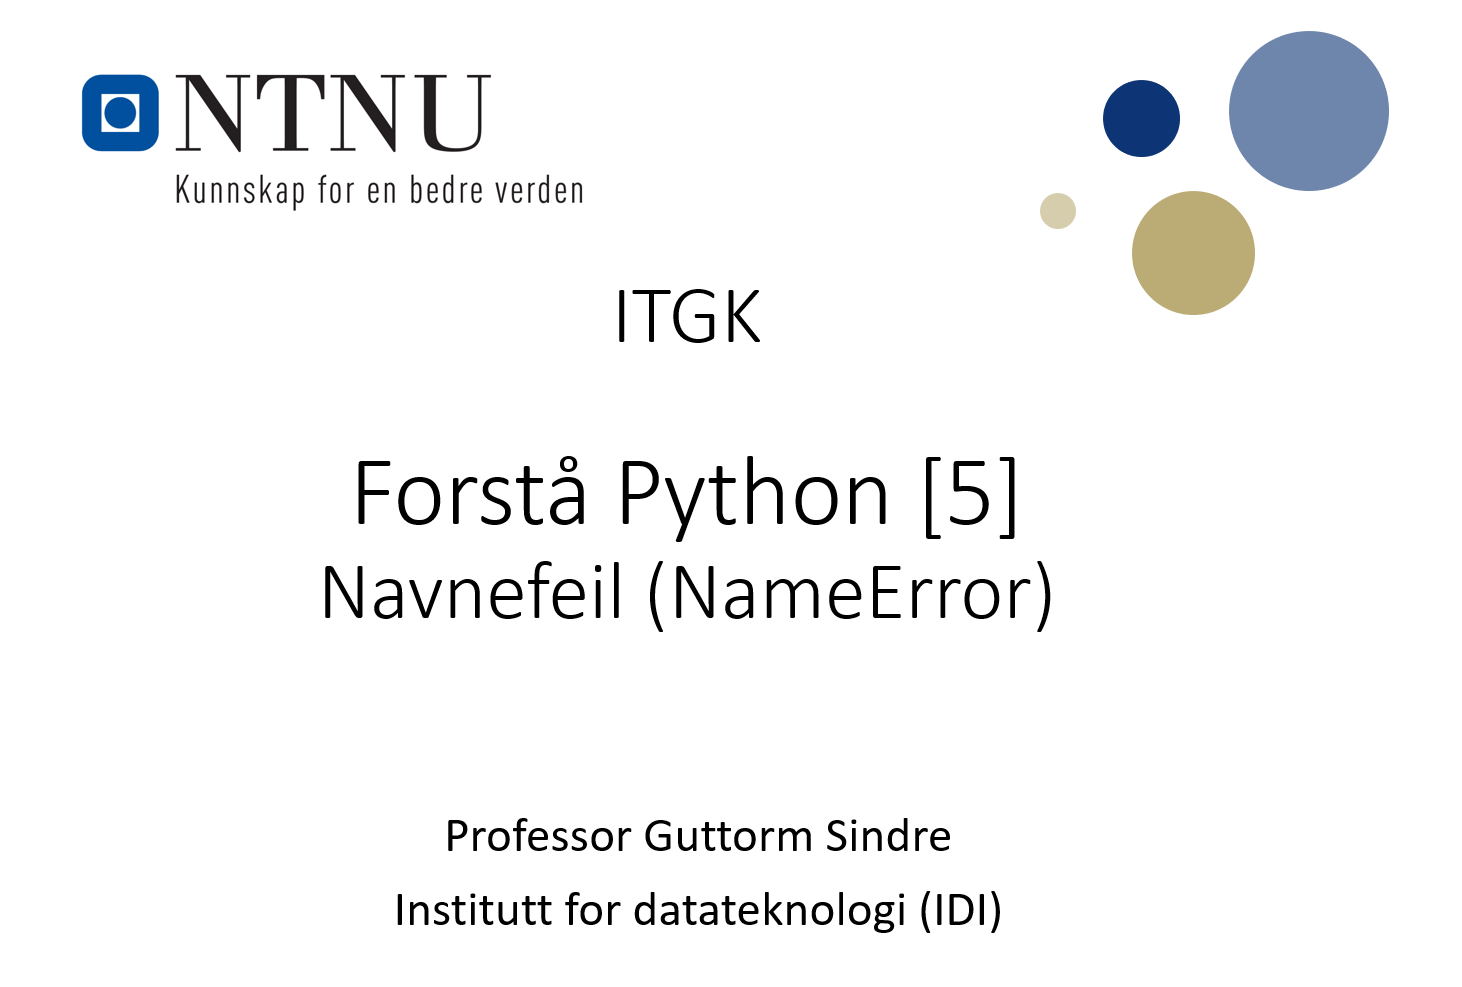

# Forstå Python \[5\] - NameError
NameError (navnefeil) i Python skjer ved bruk av et navn som ikke er definert. Det kan være
- navn på variabel
- navn på funksjon
- navn på modul, klasse, ...
- eller noe som ikke var ment som et navn
    - men Python-tolkeren tror det er navn pga. andre tabber i koden vår.
    
Vi vil her se på ulike årsaker til NameError

__Feil rekkefølge på definisjon og bruk av navn__

Eksemplet under definerer variabelen x i linje 2, 
- men den brukes allerede i linje 1. 
- Løsning er å bytte rekkefølge.

In [ ]:
y = x + 2
x = 5

Det neste eksemplet prøver å bruke en funksjon f før den er definert. 

Løsningen er igjen å bytte rekkefølge.

In [ ]:
y = f(42.9)

def f(x):
    return (x % 40) ** 3

## Tastefeil / stavefeil
Hvis vi skriver et navn feil, vil Python-tolkeren tro dette er et annet navn - som ofte da er udefinert.

I eksemplet under har vi skrevet feil
- navnet på standardfunksjonen input, og deretter
- navnet på egendefinert variabel l.5: radius, l.6: radis 

In [ ]:
def volum_kule(r):
    return 4.1887902047863905 * r ** 3

radius = float(innput('Oppgi radius: '))
print('Volumet av kula er', volum_kule(radis))

## Stor vs liten bokstav
Python skiller mellom store og små bokstaver i navn, så f.eks. er volum_kule og volum_Kule ulike navn:

In [ ]:
def volum_kule(r):
    return 4.1887902047863905 * r ** 3

radius = 5.25
print('Volumet av kula er', volum_Kule(radius))

## Glemt fnutter rundt tekststreng (med kun ett ord)
Glemte fnutter rundt tekststreng vil ofte gi syntaksfeil.
- Hvis strengen bare er ett ord, kan det tolkes som et navn og gi NameError. 

I eksemplet nedenfor mente vi å printe teksten 'Kulevolum', deretter tallverdien
- men med fnuttene utelatt blir Kulevolum tolket som et navn
- dette navnet er udefinert.

In [ ]:
def volum_kule(r):
    return 4.1887902047863905 * r ** 3

radius = 5.25
print(Kulevolum, volum_kule(radius))

# Manglende import eller feil navnebruk ved import
Eksemplet nedenfor er samme kode som før, men
- regner eksplisitt ut fire tredjedels pi
- prøver å bruke numpy.pi
    - får navnefeil fordi vi ikke har importert numpy

Generert feilmelding kan gi inntrykk av at det er to feil. Men...
- første viser hvor feilen skjer i det overordnet skript (print)
- andre viser hvor feilen skjer i funksjonen (mer presist)

Mest effektivt å se på feilmeldingen __fra bunnen og oppover__ .

Løsningen er å importere numpy med en kodelinje som senest må utføres før return-setninga.

In [ ]:
def volum_kule(r):
    return (4/3) * numpy.pi * r ** 3

radius = 5.25
print('Kulevolum', volum_kule(radius))

Neste eksempel utfører en slik import, men får likevel feil. 

Importen innfører et alias __np__ for numpy
- men bruker hele ordet numpy i linja etter. 

Hvis vi først bruker __as np__ ved import, 
- __må__ vi skrive np deretter, ikke numpy
- bare np havner i navnerommet til koden vår

In [ ]:
def volum_kule(r):
    import numpy as np
    return (4/3) * numpy.pi * r ** 3

radius = 5.25
print('Kulevolum', volum_kule(radius))

## Bruk av navn utenfor definert skop
Variable kan defineres på andre måter enn tilordningssetninger (=). 

Kodelinja __def volum_kule(r):__ definerer
- funksjonsnavnet volum_kule
- __variabelnavnet r__
Skop (dvs. anvendelsesområde) for navnet r er __kun inni funksjonen__

Nedenfor bruker vi navnet r i siste kodelinje, utenfor funksjonen. 
    - r er ikke er kjent navn i denne delen av koden
    - men radius er
    
Kan fikses enten ved r -> radius i siste linje, eller ved radius -> r i tredje siste.

Sistnevnte fiks gir oss __to variable kalt r__, en i funksjonen og en i programmet som helhet.

In [ ]:
def volum_kule(r):
    import numpy as np
    return (4/3) * numpy.pi * r ** 3

radius = 5.25
print('Kulevolum', volum_kule(radius))
print('Radius var', r)

I det neste eksemplet prøver vi å bruke navnet __np__ utenfor funksjonen. 

Siden import-setninga står inni funksjonen, vil dette ikke virke
- __navnet np er kun gyldig inni funksjonen volum_kule()__. 

In [ ]:
def volum_kule(r):
    import numpy as np
    return (4/3) * np.pi * r ** 3

radius = 5.25
print('Kulevolum', volum_kule(radius))
print('Verdien vi brukte for pi var', np.pi)

Hvis vi skal bruke numpy flere sted i et program
- bedre å importere øverst i programmet, heller enn i spesifikke funksjoner

In [ ]:
import numpy as np

def volum_kule(r):
    return (4/3) * np.pi * r ** 3

radius = 5.25
print('Kulevolum', volum_kule(radius))
print('Verdien vi brukte for pi var', np.pi)

## Oppsummering
Vi har her vist ulike årsaker til navnefeil
- forsøk på å bruke navn uten definisjon
    - manglende tilordningssetning for variabel
    - manglende definisjon av funksjon
    - manglende import av modul, eller inkonsekvent bruk av alias
- feil rekkefølge (bruk av navn før definisjon)
- feilstaving av navn, eller feil med små og store bokstaver
- manglende strengfnutter (hvis bare ett ord i strengen)
- bruk av navn utenfor definert skop
    - f.eks. navn definert lokalt i en funksjon, brukt utenfor funksjonen
    
I noen tilfeller blir feilmeldingene lange
- f.eks. hvis navnefeilen skjer inni en funksjon
- tips: Les dem nedenfra og opp for å kjapt skjønne hva som er feil

## PS. Navnekonvensjoner
Det fins anbefalte stiler for hvordan navn bør skrives i programkode.

For Python er den vanligste PEP8: https://peps.python.org/pep-0008/#naming-conventions
Noen punkt fra denne:
- variabelnavn og funksjonsnavn skrives med små bokstaver
- ved sammensatte ord, skill med _ for bedre lesbarhet, f.eks. volum_kule

Brudd på navnekonvensjoner vil ikke gi NameError, men det er anbefalt å følge dem for konsistens og lesbarhet av koden. 

KONSTANTER skrives med store bokstaver ihht PEP8. 
Nedenfor er et eksempel inkludert en slik konstant, med følgende motivasjon:
- vi ønsker ikke å ha koden (4/3) \* np.pi * r ** 3 fordi dette inkluderer en unødig divisjon og multiplikasjon hver gang vi skal regne ut volumet av ei kule
- samtidig ønsker vi ikke å sette verdien 4.1887902047863905 direkte i funksjonen siden det kan være kryptisk hva dette er
- en navngitt konstant gjør koden mer forståelig
    - og særlig hvis det var et større program hvor vi brukte denne verdien mange steder

In [ ]:
FIRE_TREDELS_PI = 4.1887902047863905

def volum_kule(r):
    return FIRE_TREDELS_PI * r ** 3

radius = 5.25
print('Kulevolum', volum_kule(radius))